En este cuaderno de jupyter se crean las visualizaciones de las políticas aprendidas por los agentes tabulares en los entornos Cliff Walking y Frozen Lake.

In [1]:
import numpy as np
import sys
import torch
import matplotlib.pyplot as plt

In [2]:
def plot_frozen_lake_policy(policy, title):
    """
    Plots the learned policy on the Frozen Lake environment.
    Where H is a hole, G is the goal, and the arrows represent the direction to move.
    """
    map_size = (8, 8)

    holes = [
        (2, 3),
        (3, 5),
        (4, 3),
        (5, 1),
        (5, 2),
        (5, 6),
        (6, 1),
        (6, 4),
        (6, 6),
        (7, 3)
    ]

    grid = np.zeros(map_size, dtype=np.int32)

    fig = plt.figure(figsize=(8, 8))
    fig.suptitle(title, fontsize=16)

    for i in range(map_size[0]):
        for j in range(map_size[1]):
            if (i, j) in holes:
                grid[i, j] = -1
                continue
            
            grid[i, j] = policy[i * map_size[0] + j]

    arrows = {
        0: (-1, 0),
        1: (0, 1),
        2: (1, 0),
        3: (0, -1)
    }

    goal = (7, 7)

    scale = 0.2
    for (i, j), label in np.ndenumerate(grid):

        if (i, j) == goal:
            plt.text(j, i, 'G', ha='center', va='center', fontsize=20, color="white")
            continue

        if (i, j) in holes:
            plt.text(j, i, 'H', ha='center', va='center', fontsize=20, color="white")
            continue
        
        arrow_size = (scale * arrows[label][0], scale * arrows[label][1])
        plt.arrow(j - arrow_size[0], i - arrow_size[1], arrow_size[0], arrow_size[1], head_width=0.25, head_length=0.25, fc='white', width=0.075, ec='black')

    plt.xticks(np.arange(0.5, map_size[1], 1), minor=True)
    plt.yticks(np.arange(0.5, map_size[0], 1), minor=True)

    plt.xticks([])
    plt.yticks([])

    plt.grid(which='minor', color='black', linestyle='-', linewidth=1)
    plt.imshow(grid, cmap='Accent_r')

    plt.show()

In [6]:
def plot_cliffwalking_policy(policy, title):
    """
    Plots the learned policy on the Cliff Walking environment.
    Where the gray cells are the cliff and the arrows represent the direction to move.
    """
    map_size = (4, 12)

    cliff_positions = [37, 38, 39, 40, 41, 42, 43, 44, 45, 46]

    grid = np.zeros(map_size, dtype=np.int32)

    fig = plt.figure(figsize=(10, 4))
    fig.suptitle(title, fontsize=16)

    for i in range(map_size[0]):
        for j in range(map_size[1]):

            if (i * map_size[1] + j) in cliff_positions:
                grid[i, j] = -1
            else:
                grid[i, j] = policy[i * map_size[1] + j]

    arrows = {
        0: (0, -1),
        1: (1, 0),
        2: (0, 1),
        3: (-1, 0),
    }

    goal = (3, 11)

    scale = 0.2
    for (i, j), label in np.ndenumerate(grid):

        if (i, j) == goal:
            plt.text(j, i, 'G', ha='center', va='center', fontsize=20, color="white")
            continue

        if (i * map_size[1] + j) in cliff_positions:
            continue
        
        arrow_size = (scale * arrows[label][0], scale * arrows[label][1])
        plt.arrow(j - arrow_size[0], i - arrow_size[1], arrow_size[0], arrow_size[1], head_width=0.25, head_length=0.25, fc='white', width=0.075, ec='black')

    plt.xticks(np.arange(0.5, map_size[1], 1), minor=True)
    plt.yticks(np.arange(0.5, map_size[0], 1), minor=True)

    plt.xticks([])
    plt.yticks([])

    plt.grid(which='minor', color='black', linestyle='-', linewidth=1)
    plt.imshow(grid, cmap='Accent_r')

    plt.show()

## Frozen Lake

### Monte Carlo First Visit

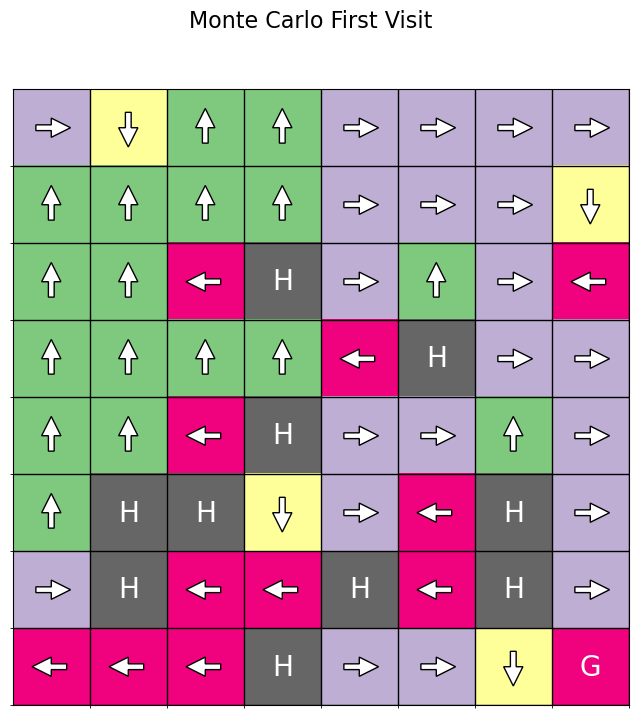

In [19]:
policy = torch.load("../saves/models/frozen_lake/FrozenLake-v1-MonteCarloFirstVisit.pth")
plot_frozen_lake_policy(policy, "Monte Carlo First Visit")

### Monte Carlo Every Visit

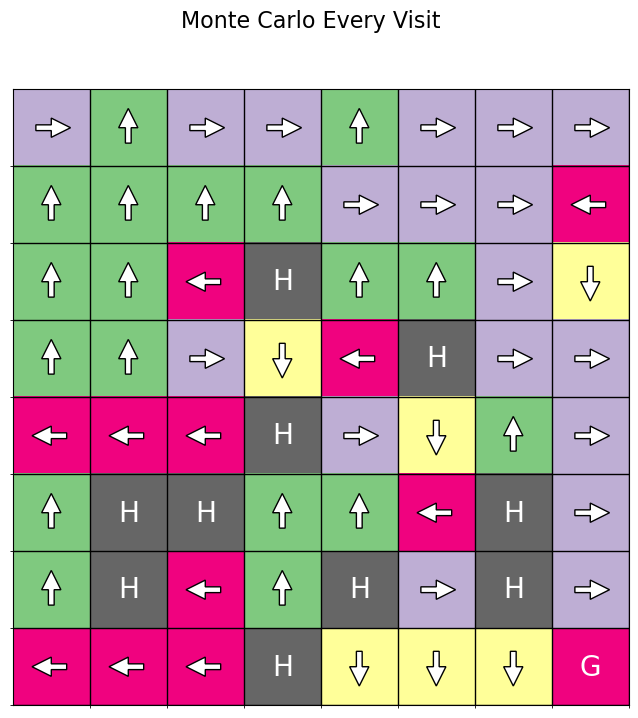

In [20]:
policy = torch.load("../saves/models/frozen_lake/FrozenLake-v1-MonteCarloEveryVisit.pth")
plot_frozen_lake_policy(policy, "Monte Carlo Every Visit")

### Sarsa

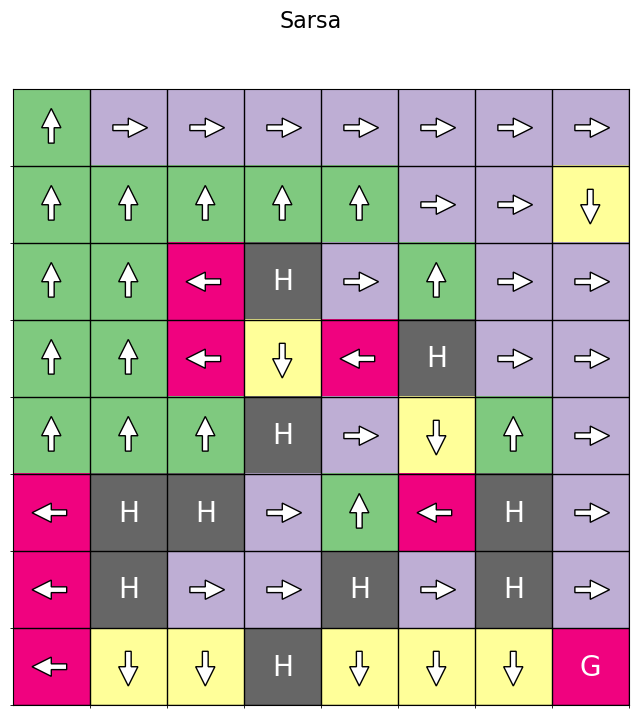

In [21]:
policy = torch.load("../saves/models/frozen_lake/FrozenLake-v1-Sarsa.pth")
plot_frozen_lake_policy(policy, "Sarsa")

### Expected Sarsa

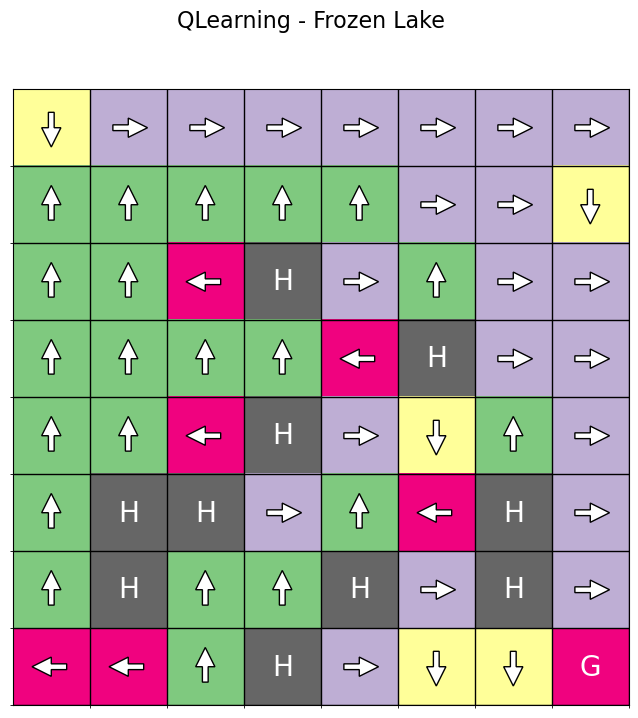

In [22]:
policy = torch.load("../saves/models/frozen_lake/FrozenLake-v1-ExpectedSarsa.pth")
plot_frozen_lake_policy(policy, "QLearning - Frozen Lake")

### QLearning

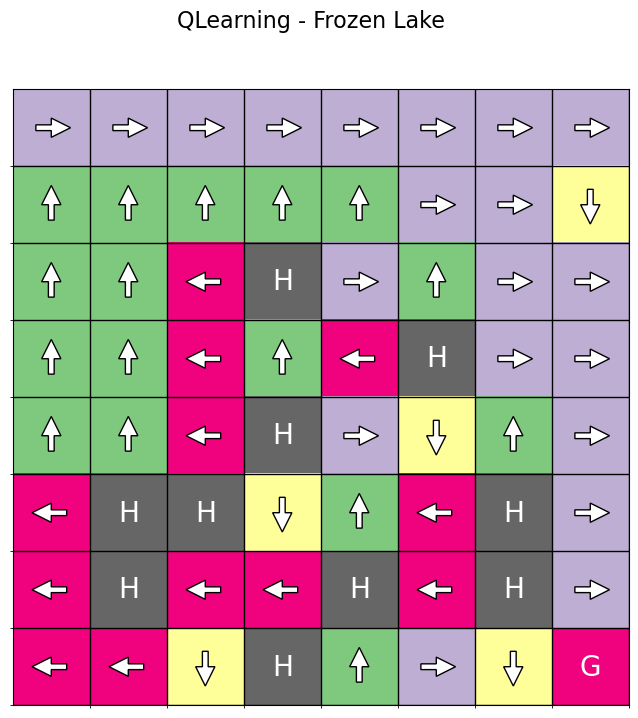

In [72]:
policy = torch.load("../saves/models/frozen_lake/FrozenLake-v1-QLearning.pth")
plot_frozen_lake_policy(policy, "QLearning - Frozen Lake")

### Double QLearning

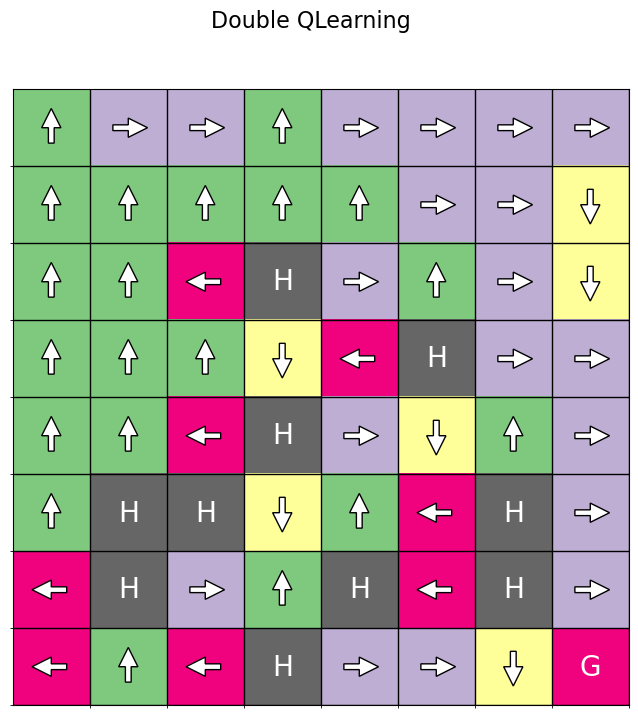

In [23]:
policy = torch.load("../saves/models/frozen_lake/FrozenLake-v1-DoubleQLearning.pth")
plot_frozen_lake_policy(policy, "Double QLearning")

### Monte Carlo Off-Policy

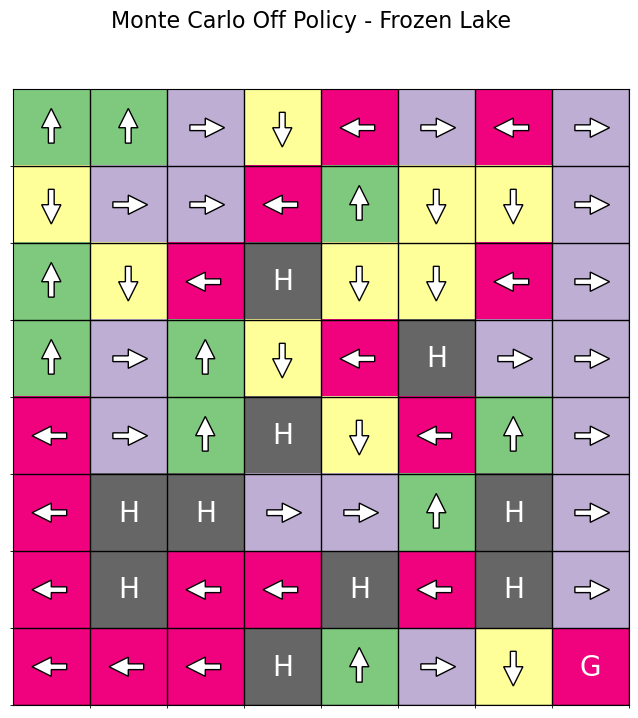

In [73]:
policy = torch.load("../saves/models/frozen_lake/FrozenLake-v1-MonteCarloOffPolicy.pth")
plot_frozen_lake_policy(policy, "Monte Carlo Off Policy - Frozen Lake")

### NStep Sarsa

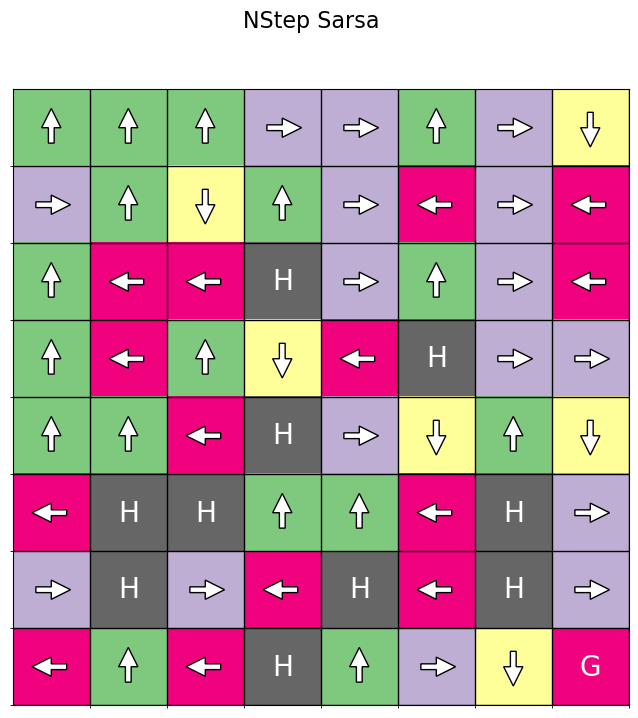

In [25]:
policy = torch.load("../saves/models/frozen_lake/FrozenLake-v1-NStepSarsa.pth")
plot_frozen_lake_policy(policy, "NStep Sarsa")

## Cliff Walking

### QLearning

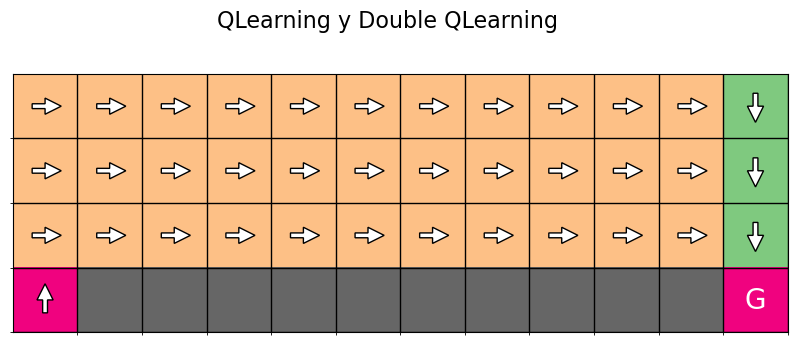

In [33]:
policy = torch.load("../saves/models/cliffwalking/CliffWalking-v0-QLearning.pth")
plot_cliffwalking_policy(policy, "QLearning y Double QLearning")

### Double QLearning

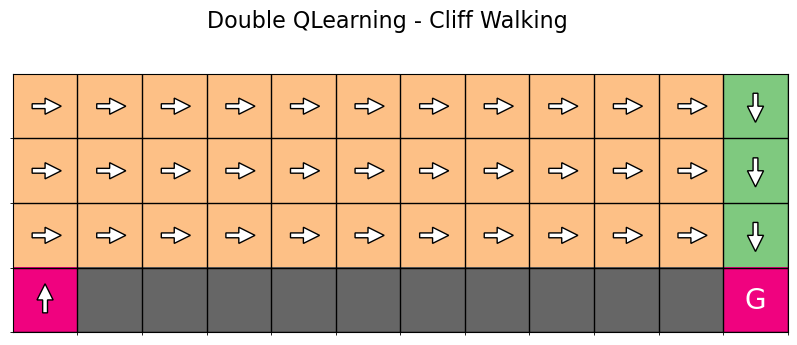

In [15]:
policy = torch.load("../saves/models/cliffwalking/CliffWalking-v0-DoubleQLearning.pth")
plot_cliffwalking_policy(policy, "Double QLearning - Cliff Walking")

### Monte Carlo First Visit

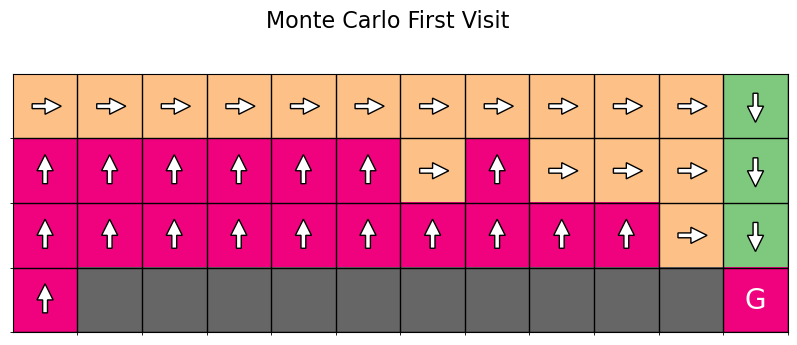

In [28]:
policy = torch.load("../saves/models/cliffwalking/CliffWalking-v0-MonteCarloFirstVisit.pth")
plot_cliffwalking_policy(policy, "Monte Carlo First Visit")

### Monte Carlo Off-Policy

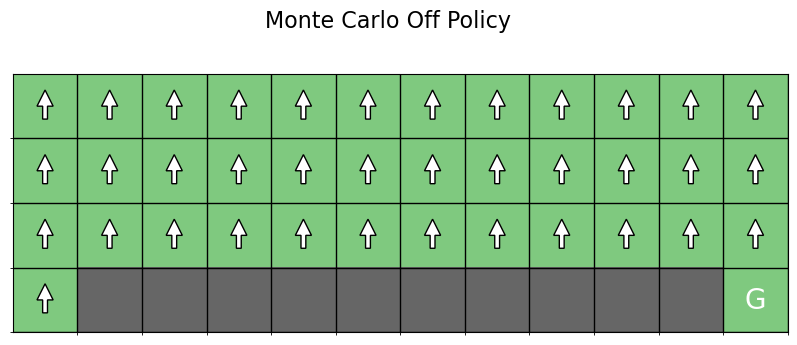

In [26]:
policy = torch.load("../saves/models/cliffwalking/CliffWalking-v0-MonteCarloOffPolicy.pth")
plot_cliffwalking_policy(policy, "Monte Carlo Off Policy")

### Monte Carlo Every Visit

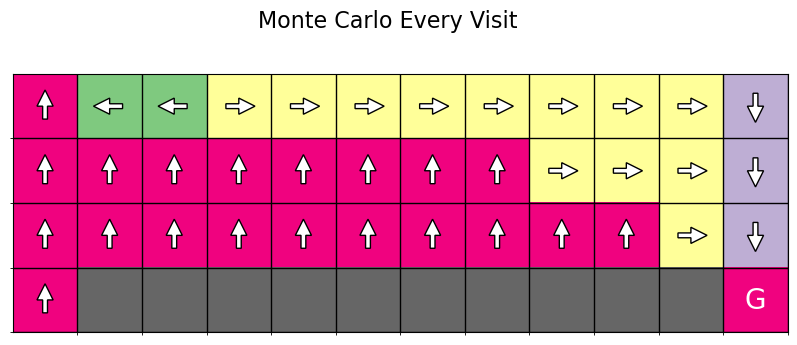

In [29]:
policy = torch.load("../saves/models/cliffwalking/CliffWalking-v0-MonteCarloEveryVisit.pth")
plot_cliffwalking_policy(policy, "Monte Carlo Every Visit")

### Sarsa

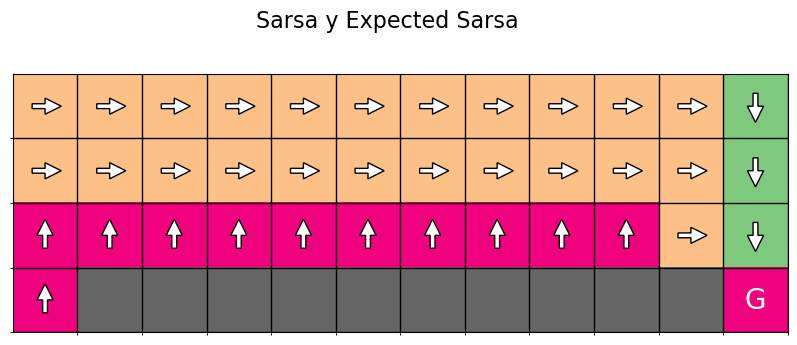

In [34]:
policy = torch.load("../saves/models/cliffwalking/CliffWalking-v0-Sarsa.pth")
plot_cliffwalking_policy(policy, "Sarsa y Expected Sarsa")

### Expected Sarsa

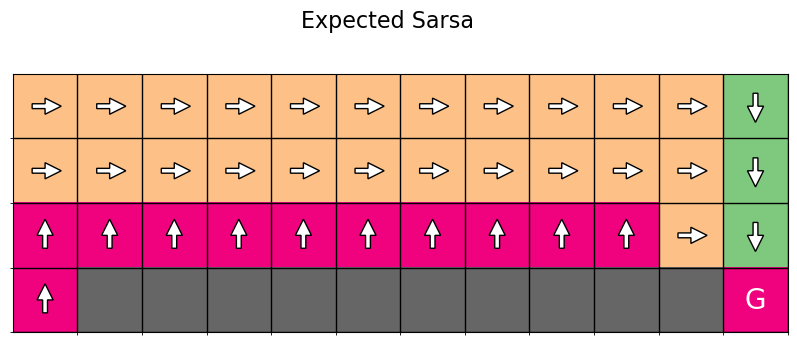

In [31]:
policy = torch.load("../saves/models/cliffwalking/CliffWalking-v0-ExpectedSarsa.pth")
plot_cliffwalking_policy(policy, "Expected Sarsa")

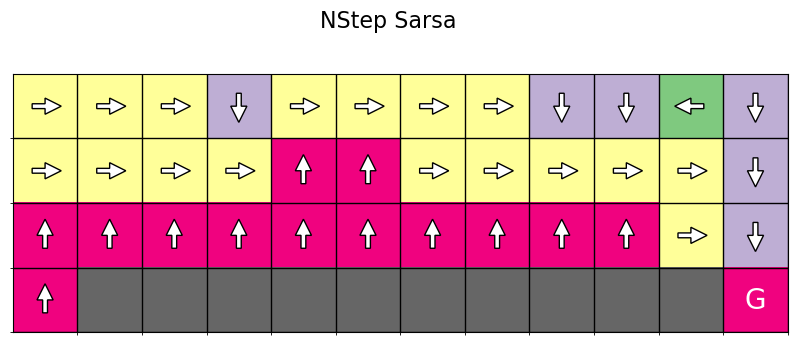

In [32]:
policy = torch.load("../saves/models/cliffwalking/CliffWalking-v0-NStepSarsa.pth")
plot_cliffwalking_policy(policy, "NStep Sarsa")